# 7th_hometask

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_blobs, make_moons

## 1. К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей по любому из показанных на уроке принципов.

#### Исходный код методички:

In [2]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y)
X_train.shape, X_test.shape

((120, 2), (30, 2))

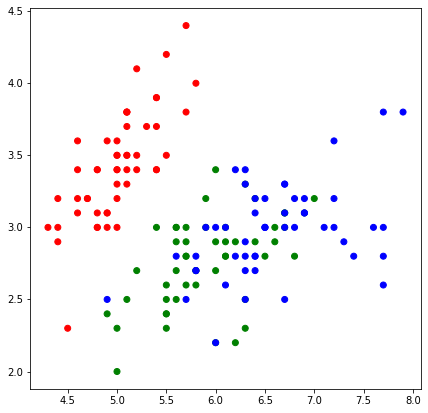

In [4]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap);

In [5]:
def e_metrics(x1, x2):
    
    distance = np.sum(np.square(x1 - x2))

    return np.sqrt(distance)

#### Используем меру весов q^p.
#### Преимуществом данной меры является устойчивость при нулевом расстоянии p.

In [6]:
def knn(x_train, y_train, x_test, k, q=0.5):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            # =================== ИЗМЕНЕНИЯ ===================
            # Вместо количества ближайших классов теперь будут суммироваться веса ближайших классов.
#             classes[d[1]] += 1
            classes[d[1]] += np.power(q, d[0])

        # =================== ИЗМЕНЕНИЯ ===================
        # Записываем в список ответов класс с наибольшим суммарным весом.
        answers.append(sorted(classes, key=classes.get)[-1])

        # =================== ИЗМЕНЕНИЯ ===================
        # Вывод весов классов при классификации каждого объекта для проверки.
        print(classes)
    print()
        
    return answers

In [7]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [8]:
%%time

k = 5

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

{0: 0, 1: 0, 2: 4.171004338864155}
{0: 4.67931698208707, 1: 0, 2: 0}
{0: 0, 1: 3.973539553090305, 2: 0}
{0: 4.4680733578122815, 1: 0, 2: 0}
{0: 4.73213196614723, 1: 0, 2: 0}
{0: 4.705724474117151, 1: 0, 2: 0}
{0: 0, 1: 1.692520359651948, 2: 2.6616282873993597}
{0: 0, 1: 0, 2: 4.562146142041059}
{0: 0, 1: 4.638757465653957, 2: 0}
{0: 0, 1: 2.534813132203641, 2: 1.6595888543524364}
{0: 4.155276400432912, 1: 0, 2: 0}
{0: 0, 1: 4.4052906106498835, 2: 0}
{0: 0, 1: 2.7462839905502636, 2: 1.8396584910435356}
{0: 0, 1: 2.418936526925194, 2: 1.7514189669936444}
{0: 0, 1: 4.499663713800375, 2: 0}
{0: 3.490523913991919, 1: 0, 2: 0}
{0: 0, 1: 1.712843335847818, 2: 2.645876327384625}
{0: 0, 1: 3.7462839905502636, 2: 0.9330329915368071}
{0: 0.7514189669936443, 1: 3.063017199087362, 2: 0}
{0: 0, 1: 3.746283990550263, 2: 0.9330329915368076}
{0: 0, 1: 0, 2: 4.612349973623878}
{0: 0, 1: 4.643242045876466, 2: 0}
{0: 4.408923494815262, 1: 0, 2: 0}
{0: 4.252745510174339, 1: 0, 2: 0}
{0: 0, 1: 1.83965849104

In [9]:
y_test

array([2, 0, 1, 0, 0, 0, 2, 2, 2, 1, 0, 1, 2, 1, 2, 0, 2, 1, 1, 2, 1, 1,
       0, 0, 2, 2, 0, 0, 1, 1])

In [10]:
y_test == y_pred

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True, False, False,  True,  True,  True,  True, False,  True,
        True, False, False])

#### Теперь для классификации алгоритм рассматривает веса ближайших соседей. Веса обратно пропорциональны расстояниям ближайших объектов до классифицируемого объекта. Таким образом, наиближайшие объекты оказывают наибольшее влияние в голосовании.

## 2. *Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутрикластерное расстояние и построить график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).

#### Исходный код методички:

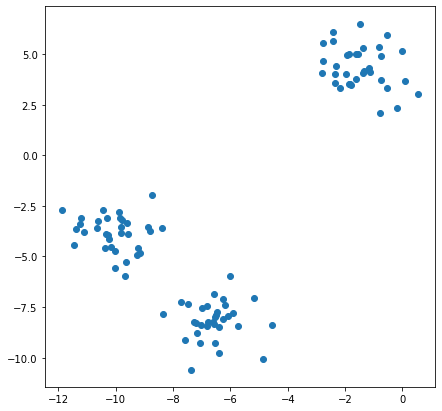

In [11]:
X, y = make_blobs(n_samples=100, random_state=1)

plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1])

In [12]:
def e_metrics(x1, x2):
    
    distance = np.sum(np.square(x1 - x2))

    return np.sqrt(distance)

In [13]:
def kmeans(data, k, max_iterations, min_distance):
    # Создадим словарь для кластеризации
    clusters = {i: [] for i in range(k)}
    
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        # кластеризуем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            cluster = distances.index(min(distances))
            clusters[cluster].append(x)
        
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения сновыми
        old_centroids = centroids.copy()
        
        # пересчитаем центроиды как среднее по кластерам
        for cluster in clusters:
            centroids[cluster] = np.mean(clusters[cluster], axis=0)
            
        # сравним величину смещения центроидов с минимальной
        optimal = True
        for centroid in range(len(centroids)):
            if np.linalg.norm(centroids[centroid] - old_centroids[centroid], ord=2) > min_distance:
                optimal = False
                break
        
        # если все смещения меньше минимального, останавливаем алгоритм  
        if optimal:
            break
    
    return old_centroids, clusters

In [14]:
def visualize(centroids, clusters):
    colors = ['r', 'g', 'b', 'orange', 'y']
    
    plt.figure(figsize=(7,7))
    
    # нанесем на график центроиды
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')
        
    # нанесем объекты раскрашенные по классам
    for cluster_item in clusters:
        for x in clusters[cluster_item]:
            plt.scatter(x[0], x[1], color=colors[cluster_item])
            
    plt.show()

In [15]:
# определим максимальное количество итераций
max_iterations = 1

# и минимальное расстояние между центроидами до пересчета и после него, при котором нужно остановить алгоритм
min_distance = 1e-4

# сразу определим известное нам количество кластеров
k = 2

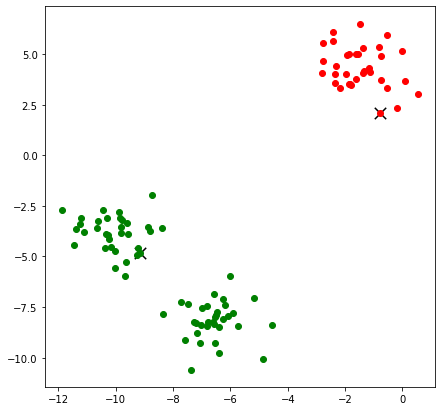

Wall time: 556 ms


In [16]:
%%time
centroids, clusters = kmeans(X, k, max_iterations, min_distance)

visualize(centroids, clusters)

#### Среднее квадратичное внутрикластерное расстояние (первый вариант):

In [17]:
def mean_squared_cluster_cohesion(centroids, clusters):
    MSCC = 0
    
    for cluster in clusters.keys():
        MSCC += np.sum(np.power(np.sum(np.power(clusters[cluster] - centroids[cluster], 2), axis=1), 0.5))
    
    return MSCC / len(clusters)

#### Для каждого объекта вычисляется разность соответствующих координат с его центроидой. Затем разность возводится в квадрат и суммируются все разности всех координат, чтобы получить расстояние от объекта до центроиды. Затем складываются все расстояния и делятся на количество кластеров.

#### Среднее квадратичное внутрикластерное расстояние (второй вариант):

In [18]:
def mean_squared_cluster_cohesion_2(centroids, clusters):
    # Переменная для среднего квадратичного внутрикластерного расстояния.
    MSCC = 0
    
    # Для каждого кластера:
    for cluster in clusters.keys():
        # Представить координаты объектов одного кластера в виде матрицы.
        # Один вектор - координаты одного объекта.
        clusters_matrix = np.array(clusters[cluster])
        
        # Для каждой координаты:
        for n in range(clusters_matrix.shape[1]):
            # вычислить разницу с координатой центроиды,
            clusters_matrix[:, n] = clusters_matrix[:, n] - centroids[cluster][n]
            # возвести разницу в квадрат, чтоб вычислить Евклидову метрику.
            clusters_matrix[:, n] = clusters_matrix[:, n] ** 2
        
        # Суммировать квадраты разностей координат для каждого объекта.
        clusters_matrix = clusters_matrix.sum(axis=1)
        # Вычислить корень суммы разностей координат, чтобы получить Евклидову метрику для каждого объекта.
        clusters_matrix = np.sqrt(clusters_matrix)
        
        # Записать сумму растояний кластера.
        MSCC += np.sum(clusters_matrix)
    
    # Вернуть нормализованную сумму метрик.
    return MSCC / len(clusters)

In [19]:
mean_squared_cluster_cohesion(centroids, clusters), mean_squared_cluster_cohesion_2(centroids, clusters)

(139.95820072798224, 139.95820072798224)

#### Вычислим среднее расстояние для трёх кластеров.

In [20]:
# определим максимальное количество итераций
max_iterations = 1

# и минимальное расстояние между центроидами до пересчета и после него, при котором нужно остановить алгоритм
min_distance = 1e-4

# сразу определим известное нам количество кластеров
k = 3

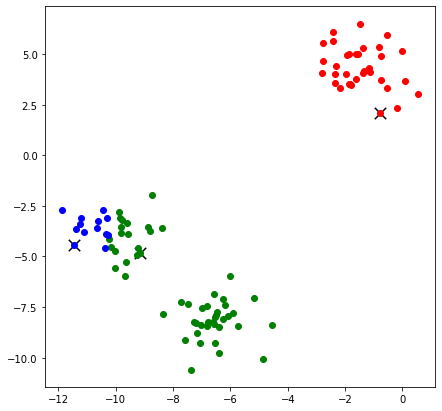

Wall time: 567 ms


In [21]:
%%time
centroids, clusters = kmeans(X, k, max_iterations, min_distance)

visualize(centroids, clusters)

In [22]:
mean_squared_cluster_cohesion(centroids, clusters), mean_squared_cluster_cohesion_2(centroids, clusters)

(89.11628327543117, 89.11628327543117)

#### Метрика улучшилась, однако визуально можно наблюдать, что разбиение выполнено нерационально. Увеличим количество итераций для сходимости алгоритма.

In [23]:
# определим максимальное количество итераций
max_iterations = 10

# и минимальное расстояние между центроидами до пересчета и после него, при котором нужно остановить алгоритм
min_distance = 1e-4

# сразу определим известное нам количество кластеров
k = 3

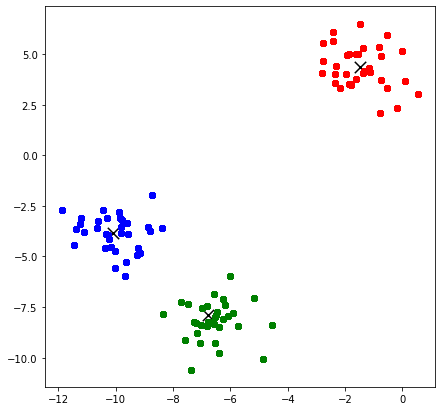

Wall time: 5.56 s


In [24]:
%%time
centroids, clusters = kmeans(X, k, max_iterations, min_distance)

visualize(centroids, clusters)

In [25]:
mean_squared_cluster_cohesion(centroids, clusters), mean_squared_cluster_cohesion_2(centroids, clusters)

(391.61116909616584, 391.61116909616584)

In [26]:
clusters_10 = clusters
centroids_10 = centroids
centroids_10

[array([-1.4710815 ,  4.33721882]),
 array([-6.7765915 , -7.90674022]),
 array([-10.08893489,  -3.83746779])]

#### Метрика увеличилась, что странно.

In [27]:
# определим максимальное количество итераций
max_iterations = 50

# и минимальное расстояние между центроидами до пересчета и после него, при котором нужно остановить алгоритм
min_distance = 1e-4

# сразу определим известное нам количество кластеров
k = 3

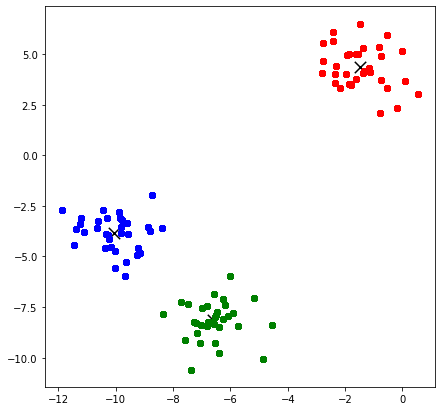

Wall time: 42.1 s


In [28]:
%%time
centroids, clusters = kmeans(X, k, max_iterations, min_distance)

visualize(centroids, clusters)

In [29]:
mean_squared_cluster_cohesion(centroids, clusters), mean_squared_cluster_cohesion_2(centroids, clusters)

(1835.8900918122854, 1835.8900918122854)

In [30]:
clusters_50 = clusters
centroids_50 = centroids
centroids_50

[array([-1.4710815 ,  4.33721882]),
 array([-6.61975194, -8.1208197 ]),
 array([-10.05619751,  -3.85572379])]

#### При пятидесяти итерациях метрика ухудшилась до неадекватных значений.

In [31]:
centroids_10

[array([-1.4710815 ,  4.33721882]),
 array([-6.7765915 , -7.90674022]),
 array([-10.08893489,  -3.83746779])]

#### При этом положение центроид практически не изменилось, что явно свидетельствует об ошибке в вычислениях.

#### Вычислим внутрикластерные расстояния для от 1 до 10 кластеров.

In [32]:
%%time

max_iterations = 10

K = np.arange(1, 11, 1)

list_MSCC = []

for k in K:
    centroids, clusters = kmeans(X, k, max_iterations, min_distance)
    list_MSCC.append(mean_squared_cluster_cohesion_2(centroids, clusters))

Wall time: 286 ms


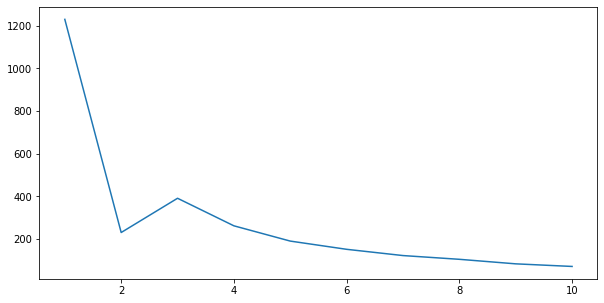

In [33]:
plt.figure(figsize=([10, 5]))

plt.plot(K, list_MSCC)

#### С увеличением количества кластеров внутрикластерное расстояние сокращается. Только при разбиении на 3 кластера наблюдается аномалия, которая усугубляется при увеличении количества итераций. К сожалению, не получается установить причину данной ошибки.

## 3. *Оптимизировать код для KNN (оставить один цикл, либо обойтись без циклов вообще).

#### Исходный код методички:

In [34]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y)
X_train.shape, X_test.shape

((120, 2), (30, 2))

In [36]:
def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
#         for i in range(len(x_train)):
            
#             # расчет расстояния от классифицируемого объекта до
#             # объекта обучающей выборки
#             distance = e_metrics(x, x_train[i])
            
#             # Записываем в список значение расстояния и ответа на объекте обучающей выборки
#             test_distances.append((distance, y_train[i]))
        
        # =================== ИЗМЕНЕНИЯ ===================
        # Для каждого объекта тестовой выборки вычисляется вектор расстояний до каждого объекта обучающей выборки.
        matrix_distances = ((x_train[:, 0] - x[0]) ** 2 + (x_train[:, 1] - x[1]) ** 2) ** 0.5
        # Из вектора расстояний получается матрица, где в каждой строке записано расстояние и класс объекта.
        matrix_distances = np.vstack((matrix_distances, y_train))
        # Матрица сортируется по возрастанию расстояний.
        matrix_distances = matrix_distances[:, matrix_distances[0, :].argsort()]
        # Выбираются классы первых k объектов с наименьшими расстояниями.
        matrix_distances = matrix_distances[1, 0:k]
                
#         # создаем словарь со всеми возможными классами
#         classes = {class_item: 0 for class_item in set(y_train)}
        
#         # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
#         for d in sorted(test_distances)[0:k]:
#             classes[d[1]] += 1
        
        # =================== ИЗМЕНЕНИЯ ===================
        # Из классов первых k объектов составляется словарь 'classes', где указан класс и количество его объектов.
        unique, counts = np.unique(matrix_distances, return_counts=True)
        classes = dict(zip(unique, counts))
        
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
        
    return answers

In [37]:
%%time

k = 3

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 3: 0.767
Wall time: 1.99 ms


##### Скорость работы алгоритма до изменения:
##### Wall time: 25 ms
##### Скорость работы алгоритма после изменения:
##### Wall time: 2.97 ms